In [20]:
from geopy.geocoders import Nominatim
import pandas as pd
import os, json, requests
import matplotlib.pyplot as plt

### Step1: Geocoding

In [2]:
geolocator = Nominatim(user_agent="app")

def get_coordinates(place):
    """Return the latitude and longitude based on the name of the place."""
    place_details = geolocator.geocode(place)
    coordinates = (place_details[1][0], place_details[1][1])
    
    return coordinates

In [3]:
chitwan = get_coordinates("Chitwan, Nepal")
chitwan

(27.61808595, 84.4536201447919)

In [4]:
newyork = get_coordinates("New York, USA")
newyork

(40.7127281, -74.0060152)

In [5]:
bonn = get_coordinates("Bonn, Germany")
bonn

(50.735851, 7.10066)

In [6]:
sydney = get_coordinates("Sydney, Australia")
sydney

(-33.8698439, 151.2082848)

In [7]:
coord = pd.DataFrame([])

places = [chitwan, newyork, bonn, sydney]

cities = ["Chitwan", "NewYork", "Bonn", "Sydney"]
coord.index = cities

coord["Latitude"] = [place[0] for place in places]
coord["Longitude"] = [place[1] for place in places]

coord

,Latitude,Longitude
Chitwan,27.618086,84.453620
NewYork,40.712728,-74.006015
Bonn,50.735851,7.100660
Sydney,-33.869844,151.208285


### Step 2: [Access renewable energy data for each location from NASA Power](https://power.larc.nasa.gov/docs/tutorials/service-data-request/api/)

[Hourly API](https://power.larc.nasa.gov/docs/services/api/temporal/hourly/#:~:text=POWER%20provides%20two%20different%20time,middle%20longitude%20of%20the%20swath.)

POWER provides two different time standards:

Universal Time Coordinated (UTC): is the standard time measure that used by the world.
Local Solar Time (LST): A 15 Degrees swath that represents solar noon at the middle longitude of the swath.

Default time zone is LST unless `time-standard=UTC` specified.

[Data request parameters](https://power.larc.nasa.gov/api/pages/?urls.primaryName=Hourly)

In [8]:
output = r""

#hourly resolution
#parameters = temperature at 2m height
#start = 20210101
#end = 20211231
#longitude and latitude are specified
#timestandard=UTC specified

#all sky surface shortwave downward irradiance
radiation_parameter = "ALLSKY_SFC_SW_DWN"
temperature_parameter = "T2M"

#base_url = r"https://power.larc.nasa.gov/api/temporal/hourly/point?parameters=T2M&community=RE&time-standard=UTC&longitude={longitude}&latitude={latitude}&start=20210101&end=20211231&format=JSON"

#for radiation
base_url = r"https://power.larc.nasa.gov/api/temporal/hourly/point?parameters=ALLSKY_SFC_SW_DWN&community=RE&time-standard=UTC&longitude={longitude}&latitude={latitude}&format=JSON&start=2020&end=2020"

#temp_data = []
rad_data = []


for latitude, longitude in places:
    
    api_request_url = base_url.format(longitude=longitude, latitude=latitude)

    response = requests.get(url=api_request_url, verify=True, timeout=200.00)
    
    content = json.loads(response.content.decode('utf-8'))
    
    #temp_data.append(content["properties"]["parameter"]["T2M"])
    rad_data.append(content["properties"]["parameter"][radiation_parameter])

rad_data


[{'2020010100': 0.0,
  '2020010101': 25.21,
  '2020010102': 158.53,
  '2020010103': 306.5,
  '2020010104': 442.52,
  '2020010105': 552.95,
  '2020010106': 508.64,
  '2020010107': 488.27,
  '2020010108': 402.05,
  '2020010109': 255.17,
  '2020010110': 119.27,
  '2020010111': 14.44,
  '2020010112': 0.0,
  '2020010113': 0.0,
  '2020010114': 0.0,
  '2020010115': 0.0,
  '2020010116': 0.0,
  '2020010117': 0.0,
  '2020010118': 0.0,
  '2020010119': 0.0,
  '2020010120': 0.0,
  '2020010121': 0.0,
  '2020010122': 0.0,
  '2020010123': 0.0,
  '2020010200': 0.0,
  '2020010201': 22.2,
  '2020010202': 135.65,
  '2020010203': 263.34,
  '2020010204': 393.78,
  '2020010205': 466.58,
  '2020010206': 562.92,
  '2020010207': 514.35,
  '2020010208': 423.33,
  '2020010209': 293.34,
  '2020010210': 137.95,
  '2020010211': 15.06,
  '2020010212': 0.0,
  '2020010213': 0.0,
  '2020010214': 0.0,
  '2020010215': 0.0,
  '2020010216': 0.0,
  '2020010217': 0.0,
  '2020010218': 0.0,
  '2020010219': 0.0,
  '2020010220': 

In [9]:
df = pd.DataFrame(rad_data).T
df.columns = cities
df

,Chitwan,NewYork,Bonn,Sydney
2020010100,0.00,0.00,0.0,890.68
2020010101,25.21,0.00,0.0,949.03
2020010102,158.53,0.00,0.0,966.41
2020010103,306.50,0.00,0.0,895.84
2020010104,442.52,0.00,0.0,776.51
...,...,...,...,...
2020123119,0.00,85.76,0.0,14.91
2020123120,0.00,35.44,0.0,54.97
2020123121,0.00,9.59,0.0,126.49
2020123122,0.00,0.00,0.0,166.04


In [19]:
df.to_csv("output/solar_irradianca_data_for_four_cities_from_NASA_Power.csv")

In [21]:
df.index

Index(['2020010100', '2020010101', '2020010102', '2020010103', '2020010104',
       '2020010105', '2020010106', '2020010107', '2020010108', '2020010109',
       ...
       '2020123114', '2020123115', '2020123116', '2020123117', '2020123118',
       '2020123119', '2020123120', '2020123121', '2020123122', '2020123123'],
      dtype='object', length=8784)

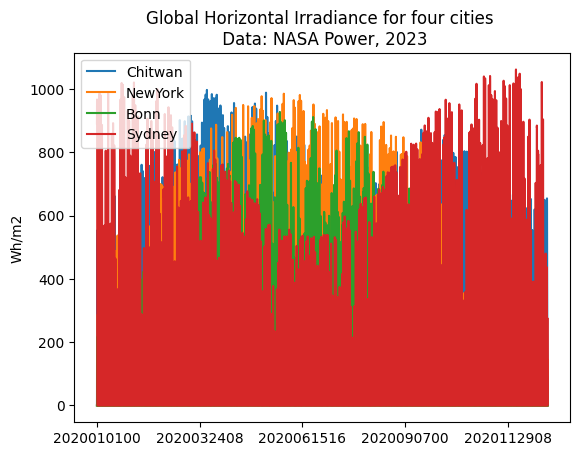

In [23]:
df.plot()
plt.title("Global Horizontal Irradiance for four cities \n Data: NASA Power, 2023")
plt.ylabel("Wh/m2")
plt.savefig("output/GHI downloaded.jpeg",
           dpi = 300)
plt.show()

In [26]:
df.sum()

Chitwan    1669381.14
NewYork    1461759.27
Bonn       1192805.55
Sydney     1631467.74
dtype: float64

In [27]:
df.describe()

,Chitwan,NewYork,Bonn,Sydney
count,8784.000000,8784.000000,8784.000000,8784.000000
mean,190.047944,166.411574,135.792982,185.731755
std,261.482190,244.489247,208.406105,264.695377
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,10.560000,9.230000,8.065000,9.755000
75%,364.895000,280.702500,204.427500,336.030000
max,996.720000,984.840000,927.180000,1061.300000


Chitwan    1669381.14
NewYork    1461759.27
Bonn       1192805.55
Sydney     1631467.74
dtype: float64